In [73]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLES = 100

s1 = np.ones(SAMPLES)
s2 = np.ones(SAMPLES)
s2[int(0.75 * SAMPLES):] = -1
E = np.sum(s1 ** 2) / SAMPLES

In [ ]:
def GM_Bases(s1, s2):
    phi1 = s1 / np.linalg.norm(s1)
    s2_proj_onto_phi1 = np.dot(s2, phi1) * phi1

    u = s2 - s2_proj_onto_phi1
    norm = np.linalg.norm(u)
    phi2 = np.zeros_like(s2) if norm == 0 else u / norm

    return phi1, phi2

def signal_space(s, phi1, phi2):
    v1 = np.dot(s, phi1) / SAMPLES
    v2 = np.dot(s, phi2) / SAMPLES
    return v1, v2

def add_noise(s, sigma2):
    noise = np.random.normal(0, np.sqrt(sigma2), s.shape)
    return s + noise

def plot(title, signals, labels, xlabel="Time", ylabel="Amplitude"):
    plt.figure()
    for i in range(len(signals)):
        plt.plot(signals[i], label=labels[i], linewidth=2)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def plot_scatter(title, xlabel, ylabel, signals, labels):
    plt.figure()
    colors = ['orange', 'yellow', 'red', 'blue']
    for i in range(len(signals)):
        if i >= len(signals) - 2:
            plt.scatter(signals[i][0], signals[i][1], label=labels[i],
                        color=colors[i], edgecolors='k')
        else:
            plt.scatter(signals[i][0], signals[i][1], label=labels[i],
                        facecolors='none', edgecolors=colors[i])    
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

phi1, phi2 = GM_Bases(s1, s2)
plot("S1 Orthonormal Bases Function", [phi1], ["φ₁(t)"])
plot("S2 Orthonormal Bases Function", [phi2], ["φ₂(t)"])

v1_s1, v2_s1 = signal_space(s1, phi1, phi2)
v1_s2, v2_s2 = signal_space(s2, phi1, phi2)
plot_scatter("Signal Space Representation", "Projection on φ₁", "Projection on φ₂",
     [(v1_s1, v2_s1), (v1_s2, v2_s2)], ["s₁(t)", "s₂(t)"])

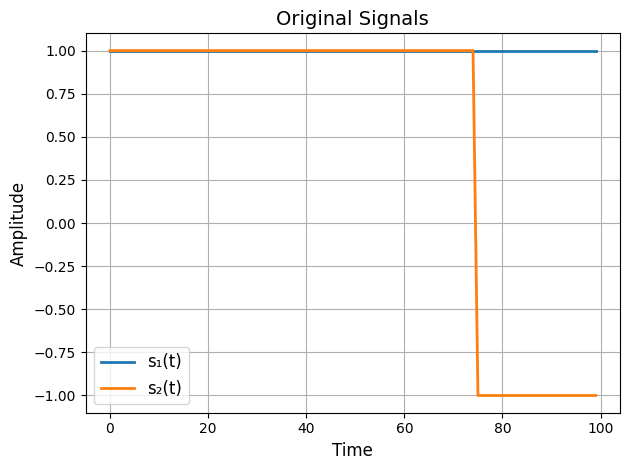

In [75]:
plot("Original Signals", s1, "s₁(t)", s2, "s₂(t)")

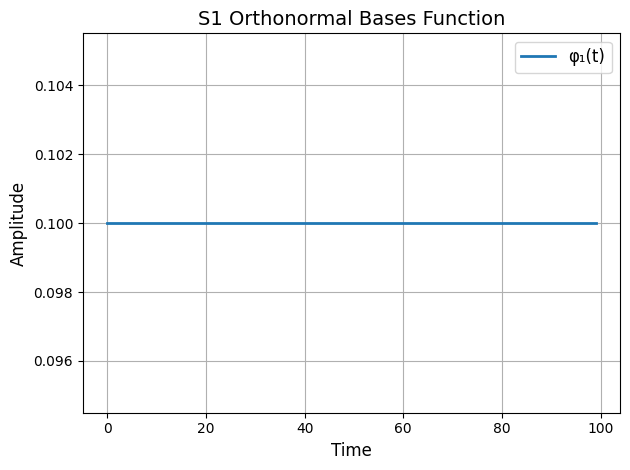

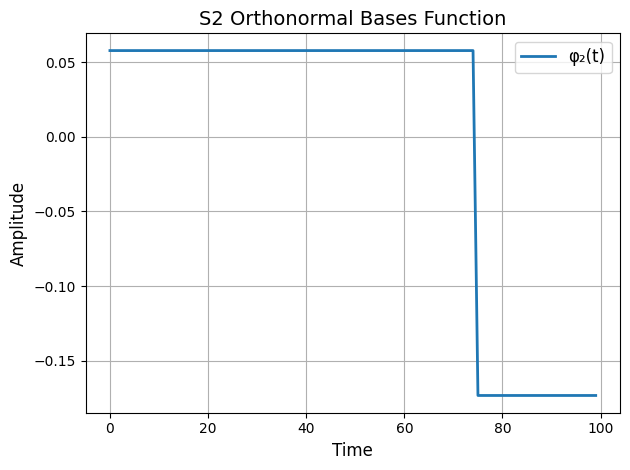

In [ ]:
phi1, phi2 = GM_Bases(s1, s2)
plot("S1 Orthonormal Bases Function", [phi1], ["φ₁(t)"])
plot("S2 Orthonormal Bases Function", [phi2], ["φ₂(t)"])

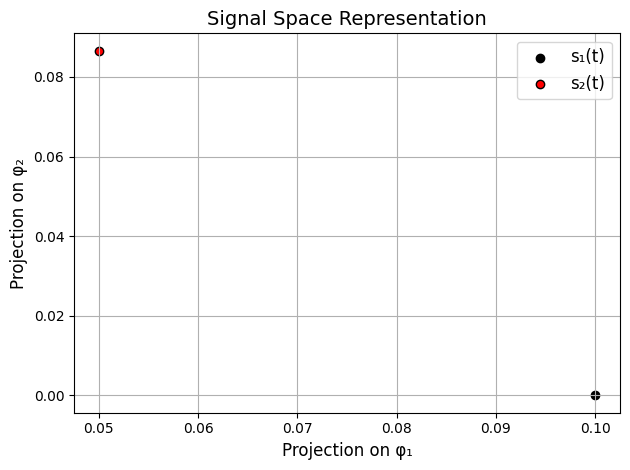

In [92]:
v1_s1, v2_s1 = signal_space(s1, phi1, phi2)
v1_s2, v2_s2 = signal_space(s2, phi1, phi2)
plot_scatter("Signal Space Representation", "Projection on φ₁", "Projection on φ₂",
     [(v1_s1, v2_s1), (v1_s2, v2_s2)], ["s₁(t)", "s₂(t)"])

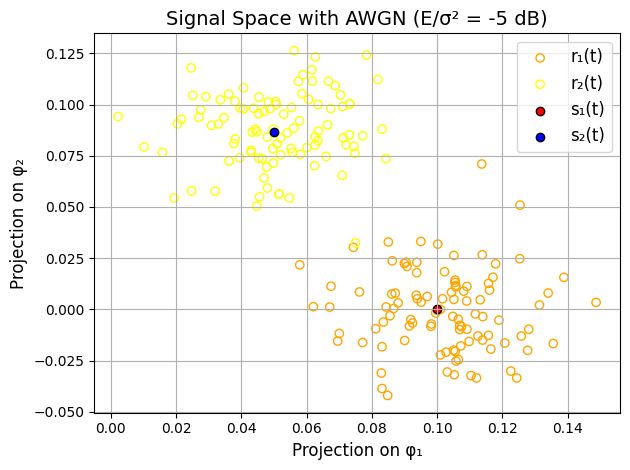

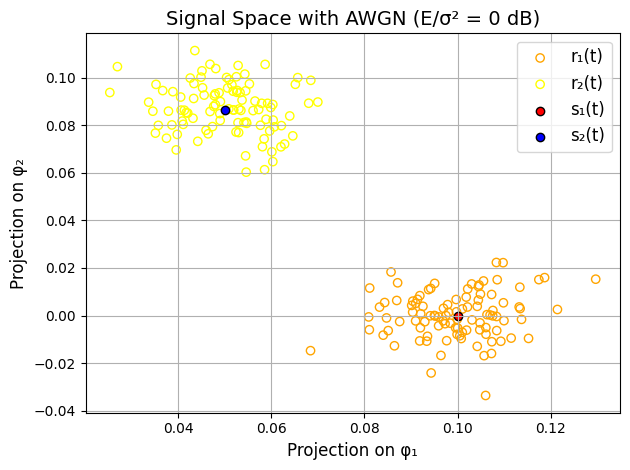

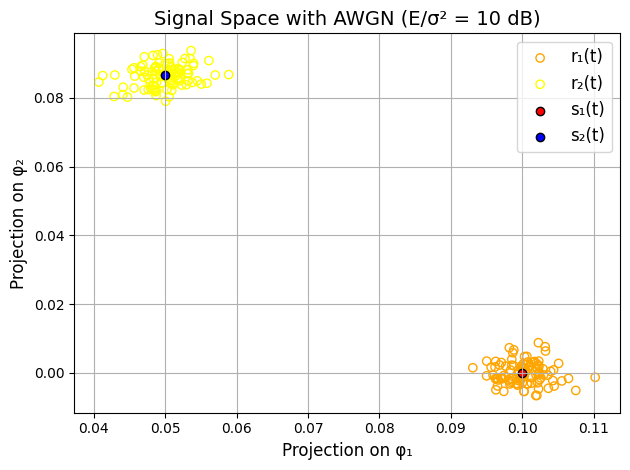

In [ ]:
for snr_db in [-5, 0, 10]:
    sigma2 = E / (10 ** (snr_db / 10))
    r1_points = []
    r2_points = []
    
    for _ in range(SAMPLES):
        r1 = add_noise(s1, sigma2)
        r2 = add_noise(s2, sigma2)
        r1_points.append(signal_space(r1, phi1, phi2))
        r2_points.append(signal_space(r2, phi1, phi2))
    
    r1_points = np.array(r1_points)
    r2_points = np.array(r2_points)
    plot_scatter(f"Signal Space with AWGN (E/σ² = {snr_db} dB)",
                 "Projection on φ₁", "Projection on φ₂",
                 [(r1_points[:,0], r1_points[:,1]), (r2_points[:,0], r2_points[:,1]),
                  (v1_s1, v2_s1), (v1_s2, v2_s2)], ["r₁(t)", "r₂(t)", "s₁(t)", "s₂(t)"])